# Graded Challenge 2
- Muhammad Nafisa Fakhri
- FTDS Batch 013

### Problem 1

Kamu adalah seorang data scientist di San Francisco Smart City. Kamu sedang mengerjakan proyek untuk menganalisa dan mengoptimasi sistem pesepedaan. Tugas pertamamu, kamu harus mencari stasiun awal mana yang paling favorit di antara stasiun-stasiun lainnya dengan menghitung PageRank menggunakan Eigendecomposition.

### SQL Syntax

Mengambil data dari SQL google cloud dengan sumber database san_francisco_bikeshare 
```
select trip_id, start_date, start_station_name, end_station_name, start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude, region_id
from `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips` 
join `bigquery-public-data.san_francisco_bikeshare.bikeshare_station_info` on `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips`.start_station_name=`bigquery-public-data.san_francisco_bikeshare.bikeshare_station_info`.name
where start_date>="2017-03-25" and start_date<="2017-08-25" and 
      start_station_latitude is not null and
      start_station_longitude is not null and 
      end_station_latitude is not null and 
      end_station_longitude is not null and 
      start_station_name != end_station_name;
```

In [1]:
# Initiation
import sympy as sy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from sympy.tensor.array import derive_by_array
from scipy import integrate
from scipy.integrate import trapz

In [2]:
# Loading Data
data_mentah = pd.read_csv("h8dsft_P0GC2_Set_1_mnfakhri.csv")
data_mentah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87274 entries, 0 to 87273
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_id                  87274 non-null  object 
 1   start_date               87274 non-null  object 
 2   start_station_name       87274 non-null  object 
 3   end_station_name         87274 non-null  object 
 4   start_station_latitude   87274 non-null  float64
 5   start_station_longitude  87274 non-null  float64
 6   end_station_latitude     87274 non-null  float64
 7   end_station_longitude    87274 non-null  float64
 8   region_id                87274 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 6.0+ MB


In [3]:
data_mentah.shape

(87274, 9)

In [4]:
data_mentah.head()

,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
0,11272017071920522700,2017-07-19 20:52:27 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
1,11422017081313454100,2017-08-13 13:45:41 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
2,13822017072517421700,2017-07-25 17:42:17 UTC,Snow Park,DeFremery Park,37.807813,-122.264496,37.812331,-122.285171,12
3,5082017072509132800,2017-07-25 09:13:28 UTC,Snow Park,12th St at 4th Ave,37.807813,-122.264496,37.795812,-122.255555,12
4,19762017080315440800,2017-08-03 15:44:08 UTC,Snow Park,12th St at 4th Ave,37.807813,-122.264496,37.795812,-122.255555,12


In [5]:
data_mentah.tail()

,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
87269,942017070509283700,2017-07-05 09:28:37 UTC,San Francisco Ferry Building (Harry Bridges Pl...,Civic Center/UN Plaza BART Station (Market St ...,37.795392,-122.394203,37.781074,-122.411738,3
87270,1692017071407332000,2017-07-14 07:33:20 UTC,San Francisco Ferry Building (Harry Bridges Pl...,Civic Center/UN Plaza BART Station (Market St ...,37.795392,-122.394203,37.781074,-122.411738,3
87271,6652017072007484500,2017-07-20 07:48:45 UTC,San Francisco Ferry Building (Harry Bridges Pl...,Civic Center/UN Plaza BART Station (Market St ...,37.795392,-122.394203,37.781074,-122.411738,3
87272,3222017072715565600,2017-07-27 15:56:56 UTC,San Francisco Public Library (Grove St at Hyde...,Civic Center/UN Plaza BART Station (Market St ...,37.778768,-122.415929,37.781074,-122.411738,3
87273,1002017081308181500,2017-08-13 08:18:15 UTC,San Francisco Public Library (Grove St at Hyde...,Civic Center/UN Plaza BART Station (Market St ...,37.778768,-122.415929,37.781074,-122.411738,3


Pembuatan dua variable baru yang bernama start_stations dan end_stations yang masing-masing berisikan list nama stasiun awal dan stasiun akhir. Pastikan tidak ada nama stasiun yang duplikat di masing-masing variable.

In [6]:
start_stations = data_mentah["start_station_name"].drop_duplicates()
start_stations

0                                                Snow Park
130                                             SAP Center
156                                            Cahill Park
176                                            Duboce Park
494                                            Esprit Park
                               ...                        
38837     Montgomery St BART Station (Market St at 2nd St)
40328    San Francisco Ferry Building (Harry Bridges Pl...
42646    San Francisco Public Library (Grove St at Hyde...
42809    Yerba Buena Center for the Arts (Howard St at ...
42847    Civic Center/UN Plaza BART Station (Market St ...
Name: start_station_name, Length: 170, dtype: object

In [7]:
end_stations = data_mentah["end_station_name"].drop_duplicates()
end_stations

0                         Mosswood Park
2                        DeFremery Park
3                    12th St at 4th Ave
6                    12th St at 6th Ave
7                   Bay Pl at Vernon St
                      ...              
6510                   San Antonio Park
7222          Foothill Blvd at 42nd Ave
7843                Julian St at 6th St
18399    26th Ave at International Blvd
18460         Morrison Ave at Julian St
Name: end_station_name, Length: 203, dtype: object

In [8]:
# Pengecekan apakah ada nama yang sama antara list start_stations dan end_station
def checking_name():
    for i in range(0,len(data_mentah)):
        if start_stations[i] == end_stations[i]:
            return(False)
        else:
            return(True)
checking_name()

True

Deteksi stasiun-stasiun yang hanya terdapat di salah satu variable dan tidak di keduanya (exclusive-or/xor). Outputnya akan berupa numpy array dan masukkan output tersebut ke dalam variable bernama exclusive_stations.

In [9]:
exclusive_stations = np.setxor1d(start_stations,end_stations)
exclusive_stations

array(['12th St at 4th Ave', '12th St at 6th Ave',
       '21st Ave at International Blvd', '26th Ave at International Blvd',
       '2nd St at S Park St', '2nd St at Townsend St - Coming Soon',
       '49th St at Telegraph Ave', '5th St at Brannan St',
       '5th St at Howard St', '5th at Folsom', '7th St at Brannan St',
       '9th St at San Fernando', 'Broadway at Kearny',
       'Central Ave at Fell St', 'Dolores St at 22nd St',
       'Foothill Blvd at 42nd Ave', 'Franklin St at 14th St',
       'Golden Gate Ave at Hyde St', 'Irwin St at 8th St',
       'Jackson St at 14th St', 'Laguna St at McAllister St',
       'Market St at Brockhurst St', 'Market St at Park St',
       'Morrison Ave at Julian St', 'S. 4th St at San Carlos St',
       'San Bruno Ave at 16th St', 'San Fernando at 7th St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'San Salvador St at 1st St', 'Shattuck Ave at 51st St',
       'Shattuck Ave at 55th Ave', 'Steuart St at Market St'

In [10]:
exclusive_stations.shape

(33,)

Membuat dataframe yang berisikan cross-tabulation antara start_stations dan end_stations. Hasil dari langkah ini merupakan dataframe yang menginfokan berapa jumlah/frekuensi perjalanan dari start station tertentu ke end station tertentu. Hasil dari langkah ini dimasukkan ke dalam variable bernama df_matrix.

In [11]:
df_matrix = pd.crosstab(start_stations,end_stations)
df_matrix

end_station_name,Cahill Park,Duboce Park,Esprit Park,Mosswood Park,Precita Park,SAP Center,Snow Park,West St at 40th St
start_station_name,,,,,,,,
18th St at Noe St,0,1,0,0,0,0,0,0
37th St at West St,0,0,0,0,0,0,0,1
45th St at Manila,0,0,0,0,0,0,1,0
Duboce Park,0,0,0,0,1,0,0,0
Precita Park,0,0,1,0,0,0,0,0
Ryland Park,0,0,0,0,0,1,0,0
SAP Center,1,0,0,0,0,0,0,0
Snow Park,0,0,0,1,0,0,0,0


In [12]:
df_matrix.shape

(8, 8)

Buatlah salinan dari data yang di-load ke dalam variable bernama df_copy.

In [13]:
df_copy = data_mentah.copy()
df_copy

,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
0,11272017071920522700,2017-07-19 20:52:27 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
1,11422017081313454100,2017-08-13 13:45:41 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
2,13822017072517421700,2017-07-25 17:42:17 UTC,Snow Park,DeFremery Park,37.807813,-122.264496,37.812331,-122.285171,12
3,5082017072509132800,2017-07-25 09:13:28 UTC,Snow Park,12th St at 4th Ave,37.807813,-122.264496,37.795812,-122.255555,12
4,19762017080315440800,2017-08-03 15:44:08 UTC,Snow Park,12th St at 4th Ave,37.807813,-122.264496,37.795812,-122.255555,12
...,...,...,...,...,...,...,...,...,...
87269,942017070509283700,2017-07-05 09:28:37 UTC,San Francisco Ferry Building (Harry Bridges Pl...,Civic Center/UN Plaza BART Station (Market St ...,37.795392,-122.394203,37.781074,-122.411738,3
87270,1692017071407332000,2017-07-14 07:33:20 UTC,San Francisco Ferry Building (Harry Bridges Pl...,Civic Center/UN Plaza BART Station (Market St ...,37.795392,-122.394203,37.781074,-122.411738,3
87271,6652017072007484500,2017-07-20 07:48:45 UTC,San Francisco Ferry Building (Harry Bridges Pl...,Civic Center/UN Plaza BART Station (Market St ...,37.795392,-122.394203,37.781074,-122.411738,3
87272,3222017072715565600,2017-07-27 15:56:56 UTC,San Francisco Public Library (Grove St at Hyde...,Civic Center/UN Plaza BART Station (Market St ...,37.778768,-122.415929,37.781074,-122.411738,3


Filter df_copy dimana tidak ada start_station_name dan end_station_name yang termasuk dalam list exclusive_stations.

In [14]:
start_stations_beda = []
end_stations_beda = []
for a in df_copy["start_station_name"]:
    if a not in exclusive_stations:
        start_stations_beda.append(a)
for b in df_copy["end_station_name"]:
    if b not in exclusive_stations:
        end_stations_beda.append(b)
df_copy["start_station_name"] = pd.Series(start_stations_beda)
df_copy["end_station_name"] = pd.Series(end_stations_beda)
df_copy.dropna(inplace=True)
df_copy

,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
0,11272017071920522700,2017-07-19 20:52:27 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
1,11422017081313454100,2017-08-13 13:45:41 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
2,13822017072517421700,2017-07-25 17:42:17 UTC,Snow Park,DeFremery Park,37.807813,-122.264496,37.812331,-122.285171,12
3,5082017072509132800,2017-07-25 09:13:28 UTC,Snow Park,Bay Pl at Vernon St,37.807813,-122.264496,37.795812,-122.255555,12
4,19762017080315440800,2017-08-03 15:44:08 UTC,Snow Park,Bay Pl at Vernon St,37.807813,-122.264496,37.795812,-122.255555,12
...,...,...,...,...,...,...,...,...,...
73379,16072017081101191700,2017-08-11 01:19:17 UTC,Powell St BART Station (Market St at 4th St),Civic Center/UN Plaza BART Station (Market St ...,37.786375,-122.404904,37.799953,-122.398525,3
73380,19682017080418542100,2017-08-04 18:54:21 UTC,Powell St BART Station (Market St at 4th St),Civic Center/UN Plaza BART Station (Market St ...,37.786375,-122.404904,37.799953,-122.398525,3
73381,9282017072416344800,2017-07-24 16:34:48 UTC,Powell St BART Station (Market St at 4th St),Civic Center/UN Plaza BART Station (Market St ...,37.786375,-122.404904,37.799953,-122.398525,3
73382,23602017073114454200,2017-07-31 14:45:42 UTC,Powell St BART Station (Market St at 4th St),Civic Center/UN Plaza BART Station (Market St ...,37.786375,-122.404904,37.799953,-122.398525,3


In [15]:
df_matrix_square = pd.crosstab(df_copy["start_station_name"],df_copy["end_station_name"])
df_matrix_square

end_station_name,10th Ave at E 15th St,10th St at Fallon St,11th St at Bryant St,11th St at Natoma St,14th St at Mandela Pkwy,14th St at Mission St,16th St at Prosper St,17th & Folsom Street Park (17th St at Folsom St),17th St at Dolores St,17th St at Valencia St,...,Union St at 10th St,Valencia St at 16th St,Valencia St at 21st St,Valencia St at 22nd St,Valencia St at 24th St,Valencia St at Cesar Chavez St,Victoria Manalo Draves Park,Washington St at Kearny St,West St at 40th St,Yerba Buena Center for the Arts (Howard St at 3rd St)
start_station_name,,,,,,,,,,,,,,,,,,,,,
10th Ave at E 15th St,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
10th St at Fallon St,0,0,0,0,4,41,6,1,0,6,...,1,1,2,1,1,1,2,2,5,0
11th St at Bryant St,0,0,0,0,3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11th St at Natoma St,0,0,2,0,1,0,0,0,0,0,...,0,2,0,1,0,0,0,0,0,0
14th St at Mandela Pkwy,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,6,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Valencia St at Cesar Chavez St,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
Victoria Manalo Draves Park,0,0,0,0,0,5,0,0,0,13,...,0,3,3,0,0,0,3,12,0,0
Washington St at Kearny St,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,4,0,0


Jumlahkan nilai kolom masing-masing rows pada df_matrix_square dan simpan ke dalam variable bernama total_trips.

In [16]:
total_trips = df_matrix_square.sum(axis=1)
total_trips

start_station_name
10th Ave at E 15th St                                     44
10th St at Fallon St                                     388
11th St at Bryant St                                      78
11th St at Natoma St                                      77
14th St at Mandela Pkwy                                   83
                                                        ... 
Valencia St at Cesar Chavez St                           149
Victoria Manalo Draves Park                              430
Washington St at Kearny St                               486
West St at 40th St                                       167
Yerba Buena Center for the Arts (Howard St at 3rd St)     75
Length: 170, dtype: int64

Pembagian setiap kolom df_matrix_square dengan inputan parameter total_trips dan axis='rows'. Masukkan hasilnya ke variable weighted_matrix_df.

In [17]:
weighted_matrix_df = df_matrix_square.div(total_trips,axis="rows")
weighted_matrix_df

end_station_name,10th Ave at E 15th St,10th St at Fallon St,11th St at Bryant St,11th St at Natoma St,14th St at Mandela Pkwy,14th St at Mission St,16th St at Prosper St,17th & Folsom Street Park (17th St at Folsom St),17th St at Dolores St,17th St at Valencia St,...,Union St at 10th St,Valencia St at 16th St,Valencia St at 21st St,Valencia St at 22nd St,Valencia St at 24th St,Valencia St at Cesar Chavez St,Victoria Manalo Draves Park,Washington St at Kearny St,West St at 40th St,Yerba Buena Center for the Arts (Howard St at 3rd St)
start_station_name,,,,,,,,,,,,,,,,,,,,,
10th Ave at E 15th St,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
10th St at Fallon St,0.0,0.0,0.000000,0.0,0.010309,0.105670,0.015464,0.002577,0.000000,0.015464,...,0.002577,0.002577,0.005155,0.002577,0.002577,0.002577,0.005155,0.005155,0.012887,0.0
11th St at Bryant St,0.0,0.0,0.000000,0.0,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.012821,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
11th St at Natoma St,0.0,0.0,0.025974,0.0,0.012987,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.025974,0.000000,0.012987,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
14th St at Mandela Pkwy,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.012048,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.072289,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Valencia St at Cesar Chavez St,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.006711,0.000000,0.006711,0.000000,0.006711,0.000000,0.000000,0.000000,0.0
Victoria Manalo Draves Park,0.0,0.0,0.000000,0.0,0.000000,0.011628,0.000000,0.000000,0.000000,0.030233,...,0.000000,0.006977,0.006977,0.000000,0.000000,0.000000,0.006977,0.027907,0.000000,0.0
Washington St at Kearny St,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.008230,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008230,0.000000,0.0


Konversikan weighted_matrix_df ke numpy array.

In [18]:
weighted_matrix_df_array = np.array(weighted_matrix_df)
weighted_matrix_df_array

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00515464, 0.0128866 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00823045, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04191617, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Perhitungan eigen value dan eigen vector menggunakan library numpy.

In [19]:
eigen_value,eigen_vector = np.linalg.eig(weighted_matrix_df_array)

In [20]:
eigen_value

array([ 1.        +0.j        ,  0.12677457+0.16823234j,
        0.12677457-0.16823234j,  0.06731524+0.18568104j,
        0.06731524-0.18568104j,  0.18280268+0.0441274j ,
        0.18280268-0.0441274j ,  0.13941338+0.12790295j,
        0.13941338-0.12790295j, -0.14460272+0.13597807j,
       -0.14460272-0.13597807j, -0.12566405+0.14037435j,
       -0.12566405-0.14037435j, -0.0088241 +0.16620707j,
       -0.0088241 -0.16620707j, -0.17345038+0.0374324j ,
       -0.17345038-0.0374324j , -0.17395558+0.j        ,
       -0.16233232+0.j        ,  0.13167175+0.08097664j,
        0.13167175-0.08097664j,  0.1000857 +0.10566464j,
        0.1000857 -0.10566464j,  0.06004933+0.13264111j,
        0.06004933-0.13264111j,  0.13312485+0.01488685j,
        0.13312485-0.01488685j,  0.02509818+0.13552959j,
        0.02509818-0.13552959j, -0.00281152+0.13779871j,
       -0.00281152-0.13779871j, -0.09722579+0.09985551j,
       -0.09722579-0.09985551j, -0.10790047+0.07817511j,
       -0.10790047-0.07817511j,

In [21]:
eigen_vector

array([[-0.0766965 +0.j        , -0.01028537+0.10863768j,
        -0.01028537-0.10863768j, ...,  0.0583013 +0.j        ,
         0.01936797-0.07698496j,  0.01936797+0.07698496j],
       [-0.0766965 +0.j        ,  0.02511749-0.02226449j,
         0.02511749+0.02226449j, ..., -0.01313772+0.j        ,
         0.00392314-0.01500385j,  0.00392314+0.01500385j],
       [-0.0766965 +0.j        ,  0.07970749-0.01235776j,
         0.07970749+0.01235776j, ...,  0.02731911+0.j        ,
         0.02203597+0.01487563j,  0.02203597-0.01487563j],
       ...,
       [-0.0766965 +0.j        , -0.04649927+0.01583849j,
        -0.04649927-0.01583849j, ...,  0.0116278 +0.j        ,
        -0.00026411+0.01264157j, -0.00026411-0.01264157j],
       [-0.0766965 +0.j        ,  0.049008  +0.05766655j,
         0.049008  -0.05766655j, ..., -0.00487252+0.j        ,
         0.02454099-0.05385642j,  0.02454099+0.05385642j],
       [-0.0766965 +0.j        , -0.12302547-0.18491478j,
        -0.12302547+0.18491478

In [22]:
eigen_value.shape

(170,)

In [23]:
eigen_vector.shape

(170, 170)

In [24]:
eigen_value_real = np.real(eigen_value)
np.argmax(eigen_value_real)

0

In [25]:
for c,value in enumerate(eigen_value_real):
    print("Eigen Value ke",c,"=",value.real)

Eigen Value ke 0 = 1.000000000000001
Eigen Value ke 1 = 0.12677456798183767
Eigen Value ke 2 = 0.12677456798183767
Eigen Value ke 3 = 0.06731524489653025
Eigen Value ke 4 = 0.06731524489653025
Eigen Value ke 5 = 0.1828026816860261
Eigen Value ke 6 = 0.1828026816860261
Eigen Value ke 7 = 0.13941337912871477
Eigen Value ke 8 = 0.13941337912871477
Eigen Value ke 9 = -0.14460271942773562
Eigen Value ke 10 = -0.14460271942773562
Eigen Value ke 11 = -0.12566405073260611
Eigen Value ke 12 = -0.12566405073260611
Eigen Value ke 13 = -0.008824101126142474
Eigen Value ke 14 = -0.008824101126142474
Eigen Value ke 15 = -0.17345038054004336
Eigen Value ke 16 = -0.17345038054004336
Eigen Value ke 17 = -0.17395558330797398
Eigen Value ke 18 = -0.16233231844172824
Eigen Value ke 19 = 0.13167175202684175
Eigen Value ke 20 = 0.13167175202684175
Eigen Value ke 21 = 0.10008570017344258
Eigen Value ke 22 = 0.10008570017344258
Eigen Value ke 23 = 0.060049334273748436
Eigen Value ke 24 = 0.060049334273748436


Eigen vector baris ke 1 adalah eigen vector yang memiliki eigen value terbesar, vektor inilah yang mengandung nilai page rank dari rute perjalanan. Eigen vektor tersebut dimasukan kedalam variabel bernama pr_scores

In [26]:
pr_scores = eigen_vector[0].real
pr_scores

array([-0.0766965 , -0.01028537, -0.01028537,  0.01142621,  0.01142621,
       -0.05060001, -0.05060001, -0.09403973, -0.09403973,  0.12118488,
        0.12118488,  0.14295434,  0.14295434, -0.03227548, -0.03227548,
       -0.03667639, -0.03667639, -0.00939841,  0.06799212,  0.031884  ,
        0.031884  ,  0.01784527,  0.01784527, -0.06029731, -0.06029731,
        0.04790896,  0.04790896,  0.02550168,  0.02550168,  0.01840126,
        0.01840126, -0.02384188, -0.02384188,  0.05300931,  0.05300931,
       -0.03883489, -0.03884819, -0.03884819,  0.02984883,  0.02984883,
       -0.00592592, -0.00592592, -0.0661973 , -0.0661973 ,  0.12397944,
        0.12397944, -0.05625732, -0.05625732,  0.05752906,  0.05752906,
       -0.07591897, -0.07591897, -0.02060068, -0.17074729, -0.01171311,
       -0.01171311,  0.01158984,  0.01158984,  0.06025921,  0.06025921,
       -0.06576937, -0.06576937,  0.09201577,  0.09201577, -0.10939265,
       -0.10939265, -0.01202679, -0.01202679,  0.08380367,  0.08

Pembuatan dataframe baru bernama PageRank_df dengan kolom 'start_station' yang berisikan value variable start_stations dan kolom score yang berisikan value variable PR_Scores.

In [37]:
PageRank_df = pd.DataFrame({"Start Station":start_stations,"PR Scores":pr_scores}).reset_index(drop=True)
PageRank_df.sort_values(by="PR Scores",ascending=False)

,Start Station,PR Scores
12,San Antonio Park,0.142954
11,Franklin Square,0.142954
44,2nd Ave at E 18th St,0.123979
45,8th St at Ringold St,0.123979
9,Mosswood Park,0.121185
...,...,...
109,Telegraph Ave at 23rd St,-0.109345
64,4th St at Harrison St,-0.109393
65,Adeline St at 40th St,-0.109393
166,San Francisco Ferry Building (Harry Bridges Pl...,-0.126981


# Pertanyaan Analisis

1. Mengapa dalam kasus ini kita menerapkan konsep Eigendecomposition?
- Karena dalam kasus ini kita akan mencari stasiun awal mana yang menjadi favorit dalam rute pesepeda ini. dengan menghitung nilai eigen dan vektor eigen kita dapat menentukan stasiun awal mana yang menjadi favorit pesepeda yang dilambangkan dengan nilai eigen.

2. Dari pengamatanmu, mengapa pada akhirnya kita menggunakan dataframe df_matrix_square dibandingkan df_matrix untuk dilakukan proses Eigendecomposition? Berikan alasan yang logis sesuai dengan konsep Eigendecomposition.
- Karena syarat matrix untuk mencari vektor eigen dan nilai eigen adalah matriks persegi yang dimana jumlah baris dan kolom harus sama serta nilai dari baris matrix tersebut harus sama dengan nilai kolom vektor yang digunakan untuk mencari nilai dan vektor eigen. Dalam kasus ini yang kita cari adalah stasiun awal favorit dari pesepeda dan itu merupakan vektor tersebut. Jumlah baris dari matrix df_matrix tidak sama dengan kolom vektor stasiun awal, sedangkan jumlah baris matrix df_matrix_square sama dengan jumlah kolom dari vektor stasiun awal. Maka dari itu kita menggunakan df_matrix_square sebagai matrix untuk mencari nilai eigen dan vektor eigen.

3. Jika dilihat dari PageRanknya, dimana nilai PageRank paling besar merupakan stasiun yang paling favorit. Apa insight yang akan kamu berikan?
- Stasiun dengan nilai page rank terbesar adalah stasiun "San Antonio Park" dikarenakan stasiun tersebut memiliki nilai Page Rank terbesar yaitu 0.142954 yang dimana menunjukkan bahwa stasiun tersebut merupakan stasiun awal favorit yang dilewati banyak pesepeda.

## Problem 2

Menghitung luas area lingkup stasiun awal sepeda di kota San Francisco dengan menggunakan integral.

Pembuatan tabel dengan nilai region id = 3 yang terdiri dari start station name, start station latitude dan start station longitude dan diurutkan berdasarkan nilai start station longitude terkecil.

In [29]:
df_coor_stations = data_mentah.loc[data_mentah["region_id"] == 3,
                    ["start_station_name","start_station_latitude",
                    "start_station_longitude"]].sort_values(by="start_station_longitude",ascending=True).reset_index(drop=True)
df_coor_stations

,start_station_name,start_station_latitude,start_station_longitude
0,McAllister St at Baker St,37.777416,-122.441838
1,McAllister St at Baker St,37.777416,-122.441838
2,McAllister St at Baker St,37.777416,-122.441838
3,McAllister St at Baker St,37.777416,-122.441838
4,McAllister St at Baker St,37.777416,-122.441838
...,...,...,...
71749,The Embarcadero at Bryant St,37.787168,-122.388098
71750,The Embarcadero at Bryant St,37.787168,-122.388098
71751,The Embarcadero at Bryant St,37.787168,-122.388098
71752,The Embarcadero at Bryant St,37.787168,-122.388098


In [30]:
df_coor_stations_clean = df_coor_stations.drop_duplicates().reset_index(drop=True)
df_coor_stations_clean

,start_station_name,start_station_latitude,start_station_longitude
0,McAllister St at Baker St,37.777416,-122.441838
1,O'Farrell St at Divisadero St,37.782405,-122.439446
2,Broderick St at Oak St,37.773063,-122.439078
3,Grove St at Divisadero,37.775946,-122.437777
4,Scott St at Golden Gate Ave,37.778999,-122.436861
...,...,...,...
91,Beale St at Harrison St,37.788059,-122.391865
92,The Embarcadero at Steuart St,37.791464,-122.391034
93,Esprit Park,37.761634,-122.390648
94,Spear St at Folsom St,37.789677,-122.390428


Visualisasi berupa grafik garis dengan Longitude merupakan sumbu x dan Latitude merupakan sumbu y.

<AxesSubplot:xlabel='start_station_longitude'>

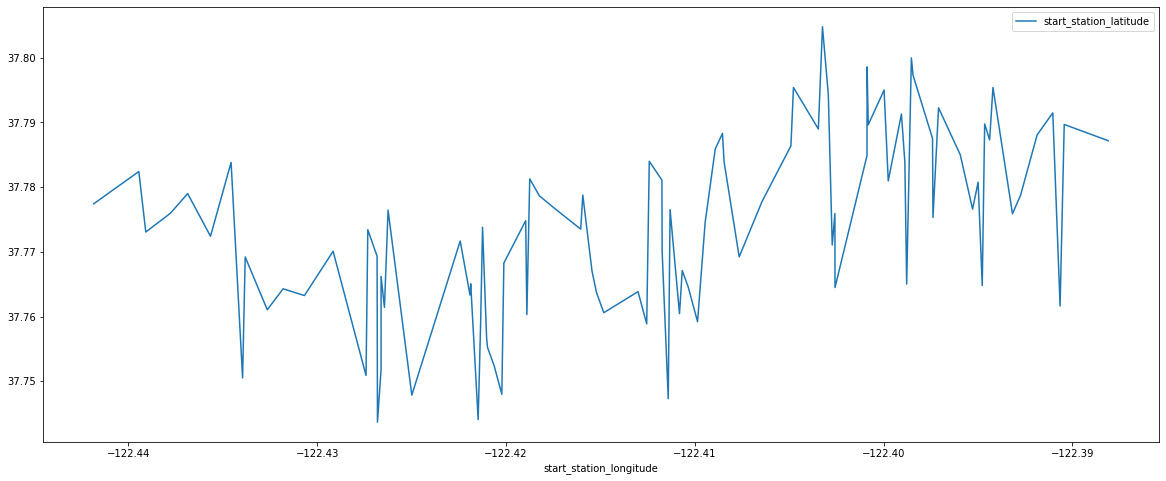

In [31]:
df_coor_stations_clean.plot(x="start_station_longitude",y="start_station_latitude",figsize=(20,8))

Perhitungan luas area yang dilingkup stasiun awal

In [32]:
x = df_coor_stations_clean["start_station_longitude"]
y = df_coor_stations_clean["start_station_latitude"]

luas_area = trapz(y,x)
luas_area

2.0299927116855434

Luas daerah yang dilingkupi stasiun awal sebesar 2.0299927116855434 square degree

# Pertanyaan Analisis

1. Terdapat 2 jenis integral yaitu definite dan indefinite. Jenis integral apa yang kamu gunakan untuk kasus ini? Berikan alasanmu!
- Jenis integral yang digunakan dalam kasus ini adalah integral definite karena kita menggunakan nilai batas untuk penentuan luas daerah yang dilewati dan hasil dari integral definit berupa angka yang memiliki arti sesuatu. jika kita menggunakan integral indefinit maka hasil yang keluar berupa nilai yang tidak berujung. (Indefinit = tidak bisa didefinisikan)

2. Terdapat dua metode dalam perhitungan integral yaitu simbolik dan numerik. Mana yang kamu gunakan untuk kasus ini dan mengapa?
- Metode yang digunakan dalam perhitungan integral di kasus ini adalah perhitungan integral numerik, karena kita ingin menghasilkan nilai dari sesuatu. jika kita menggunakan integral simbolik hanya menghasilkan persamaan saja tanpa menghasilkan nilai dari sesuatu.

3. Apakah diperlukan mendefinisikan fungsi matematis ( seperti f(x) = x^2+2 ) pada kasus ini? Berikan penjelasan dan alasanmu!
- Tidak perlu, karena dalam kasus ini kita bisa menggunakan fungsi yang dimiliki oleh sympy sebagai fungsi perhitungan integral (trapz), maka dari itu tidak diperlukan lagi persamaan matematika dalam kasus ini.